## K_Means Clustering

### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
#import pandas_profiling
#import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("iris.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


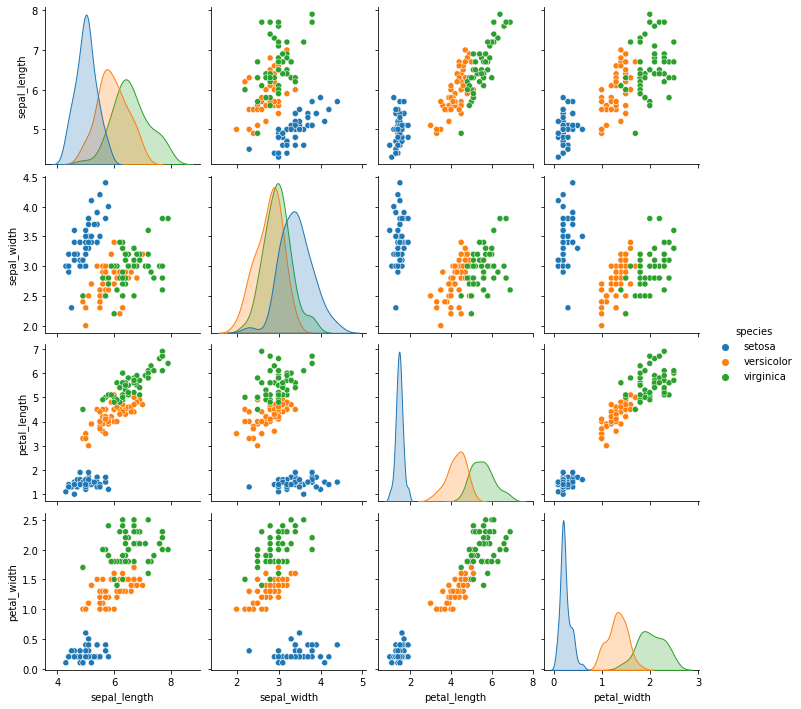

In [ ]:
sns.pairplot(data=df, hue="species");

### Scaling Data

**The K-means algorithm definitely needs scaling**. However, if all our data has the same unit of measure, **there is no need to scale the data**. For these data, scaling may cause worse results in some cases. You have to experience

### K_Means Clustering

In [ ]:
X = df.drop("species", axis=1)

In [ ]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X.shape

(150, 4)

In [ ]:
K_means_model = KMeans(n_clusters=5, random_state=42)

In [ ]:
K_means_model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [ ]:
K_means_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

In [ ]:
X["Classes"] = K_means_model.labels_

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width,Classes
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,4
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,4
148,6.2,3.4,5.4,2.3,4


### Hopkins Test

In [ ]:
X = X.drop("Classes", axis=1)

In [ ]:
# !pip install pyclustertend

In [ ]:
from pyclustertend import hopkins

In [ ]:
X.shape[0]

150

In [ ]:
hopkins(X, X.shape[0]) 


0.1713013256106581

## Choosing The Optimal Number of Clusters

### Elbow Metod

In [ ]:
model.inertia_


78.94084142614601

In [ ]:
ssd = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)
    


Text(0.5, 1.0, 'elbow method')

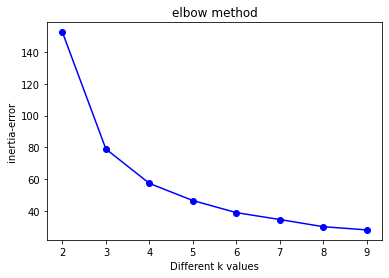

In [ ]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [ ]:
ssd

[152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.930963049671746,
 34.598978434287126,
 30.085307692307698,
 28.063274732725528]

In [ ]:
pd.Series(ssd).diff()

0          NaN
1   -73.427865
2   -21.622968
3   -10.782291
4    -7.604619
5    -4.331985
6    -4.513671
7    -2.022033
dtype: float64

In [ ]:
pd.DataFrame(-pd.Series(ssd).diff(), index=range(1,8)) 
# Değerleri pozitif yapmak için pd nin başına (-) eksi koyduk.

,0
1,73.427865
2,21.622968
3,10.782291
4,7.604619
5,4.331985
6,4.513671
7,2.022033


In [ ]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,73.427865
3,21.622968
4,10.782291
5,7.604619
6,4.331985
7,4.513671
8,2.022033


<AxesSubplot:>

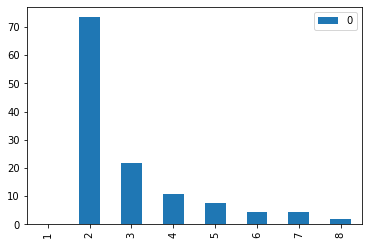

In [ ]:
df_diff.plot(kind='bar')


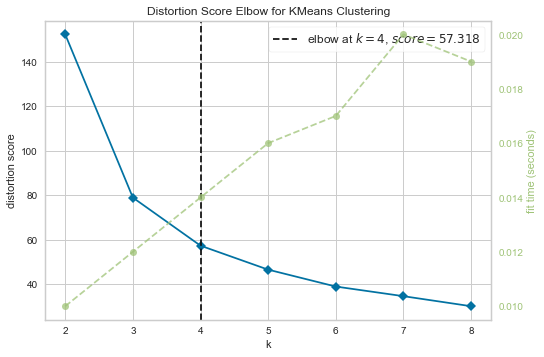

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();


### Silhouette analysis

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, K_means_model.labels_)


0.4885175508886279

In [ ]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")


For n_clusters=2, the silhouette score is 0.6808136202936816
For n_clusters=3, the silhouette score is 0.5525919445499757
For n_clusters=4, the silhouette score is 0.4978256901095472
For n_clusters=5, the silhouette score is 0.4885175508886279
For n_clusters=6, the silhouette score is 0.36820569682713084
For n_clusters=7, the silhouette score is 0.3576975600180635
For n_clusters=8, the silhouette score is 0.35912838676456094


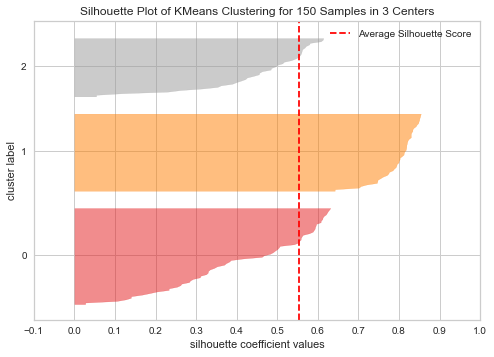

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
model3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model3)
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();


### Building the model based on the optimal number of clusters

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [ ]:
clusters = model.labels_

In [ ]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df["predicted_clusters"] = clusters

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [ ]:
ct = pd.crosstab(df.predicted_clusters, df.species)
ct


species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,48,14
1,50,0,0
2,0,2,36


### Adjust Rand Score

In [ ]:
from sklearn.metrics import adjusted_rand_score

In [ ]:
df_end = df
df_end

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [ ]:
adjusted_rand_score(df_end.species, df_end.predicted_clusters)


0.7302382722834697

### Visualization Clusters

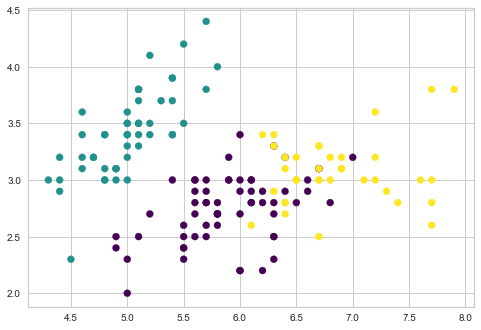

In [ ]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = df.predicted_clusters, cmap = "viridis")

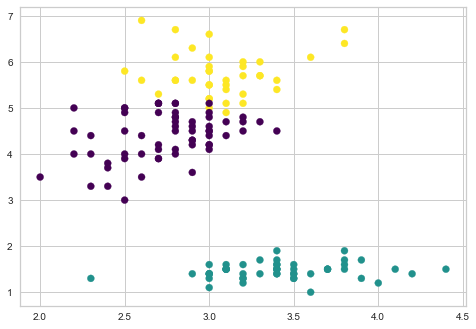

In [ ]:
plt.scatter(df.iloc[:,1], df.iloc[:,2], c = df.predicted_clusters, cmap = "viridis")

In [ ]:
centers = model.cluster_centers_
centers


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
centers[:,0]

array([5.9016129, 5.006    , 6.85     ])

In [ ]:
centers[:,1]

array([2.7483871 , 3.418     , 3.07368421])

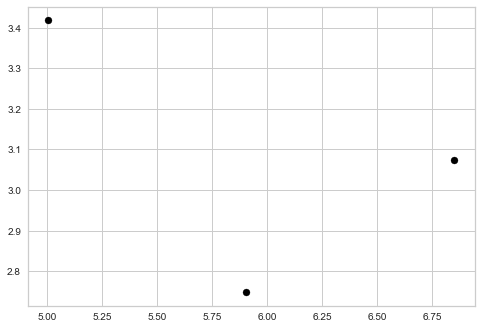

In [ ]:
plt.scatter(centers[:,0], centers[:,1], c = "black")


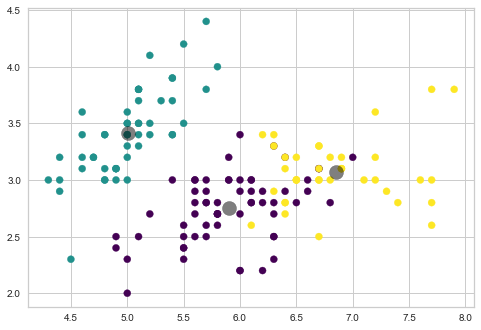

In [ ]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### Remodeling According To Discriminating Features

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [ ]:
clus_pred = df.iloc[:, [0, 1, 2, 3, 5]].groupby("predicted_clusters").mean()
clus_pred


predicted_clusters,0,1,2
sepal_length,5.901613,5.006,6.850000
sepal_width,2.748387,3.418,3.073684
petal_length,4.393548,1.464,5.742105
petal_width,1.433871,0.244,2.071053


In [ ]:
clus_pred = df.iloc[:, [0, 1, 2, 3, 5]].groupby("predicted_clusters").mean().T
clus_pred

<AxesSubplot:>

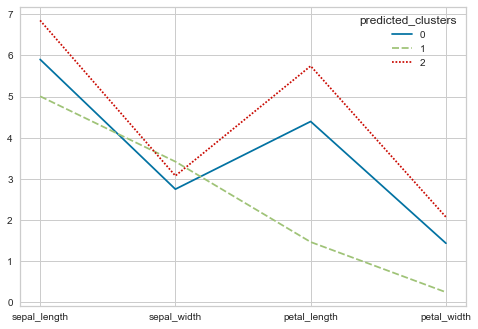

In [ ]:
sns.lineplot(data = clus_pred)


In [ ]:
Z = df.iloc[:, [2,3]]
Z

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


### Hopkins test

In [ ]:
hopkins(Z, Z.shape[0])


0.10887329989868928

### Elbow metod

In [ ]:
ssd = []
K = range(2,10)
for k in K:
    model3 = KMeans(n_clusters =k)
    model3.fit(Z)
    ssd.append(model3.inertia_)

Text(0.5, 1.0, 'elbow method')

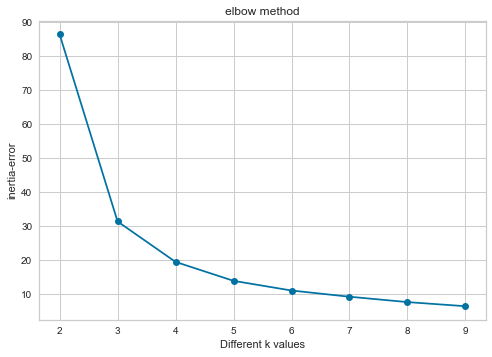

In [ ]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [ ]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,55.016186
3,11.888358
4,5.566092
5,2.843522
6,1.828448
7,1.577919
8,1.210525


<AxesSubplot:>

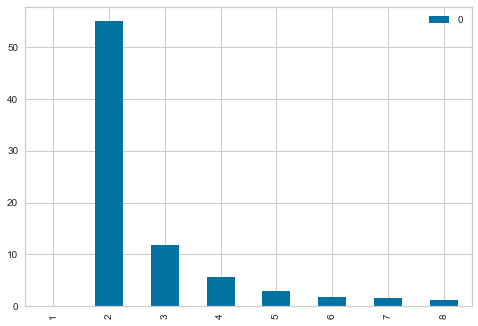

In [ ]:
df_diff.plot(kind='bar')

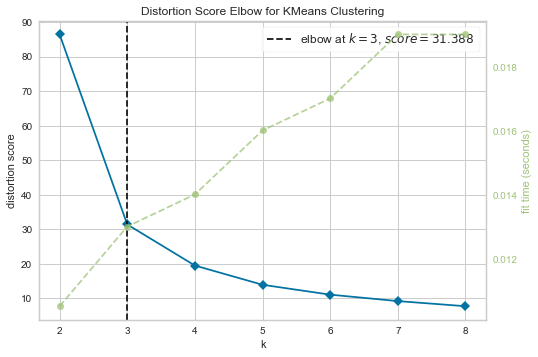

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))
visualizer.fit(Z)        # Fit the data to the visualizer
visualizer.show();


### Silhouette analysis

In [ ]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(Z)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(Z, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")


For n_clusters=2, the silhouette score is 0.7651755502866581
For n_clusters=3, the silhouette score is 0.6602760882193361
For n_clusters=4, the silhouette score is 0.612530696724084
For n_clusters=5, the silhouette score is 0.5881403468025436
For n_clusters=6, the silhouette score is 0.5760543202653141
For n_clusters=7, the silhouette score is 0.5730470479747247
For n_clusters=8, the silhouette score is 0.5847618631252907


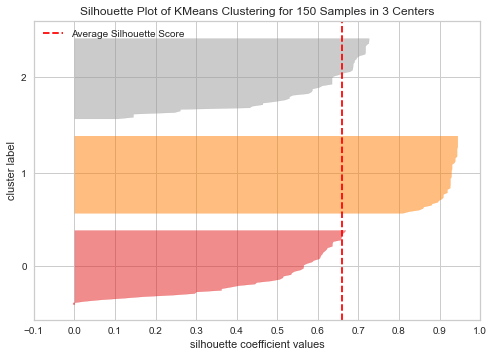

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model3)
visualizer.fit(Z)    # Fit the data to the visualizer
visualizer.poof();


### Building the model based on the optimal number of clusters

In [ ]:
model2 = KMeans(n_clusters =3, random_state=42)
model2.fit(Z)

KMeans(n_clusters=3, random_state=42)

In [ ]:
model2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
Z["species"] = df["species"]

In [ ]:
Z["predicted_clusters"] = model2.labels_

In [ ]:
Z

,petal_length,petal_width,species,predicted_clusters
0,1.4,0.2,setosa,1
1,1.4,0.2,setosa,1
2,1.3,0.2,setosa,1
3,1.5,0.2,setosa,1
4,1.4,0.2,setosa,1
...,...,...,...,...
145,5.2,2.3,virginica,0
146,5.0,1.9,virginica,0
147,5.2,2.0,virginica,0
148,5.4,2.3,virginica,0


In [ ]:
Z_end = Z
Z_end

,petal_length,petal_width,species,predicted_clusters
0,1.4,0.2,setosa,1
1,1.4,0.2,setosa,1
2,1.3,0.2,setosa,1
3,1.5,0.2,setosa,1
4,1.4,0.2,setosa,1
...,...,...,...,...
145,5.2,2.3,virginica,0
146,5.0,1.9,virginica,0
147,5.2,2.0,virginica,0
148,5.4,2.3,virginica,0


### Adjust Rand Score

In [ ]:
adjusted_rand_score(Z_end.species, Z_end.predicted_clusters)


0.8856970310281228

### Compare results

In [ ]:
pd.crosstab(Z.predicted_clusters, Z.species)

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,2,46
1,50,0,0
2,0,48,4


In [ ]:
Z_ct = pd.crosstab(Z.predicted_clusters, Z.species).rename(index={0:2, 2:0})
Z_ct.columns = ["setosa_Z", "versicolor_Z", "virginica_Z"]
Z_ct

,setosa_Z,versicolor_Z,virginica_Z
predicted_clusters,,,
2,0,2,46
1,50,0,0
0,0,48,4


In [ ]:
X_ct = pd.crosstab(df.predicted_clusters, df.species)
X_ct.columns = ["setosa_X", "versicolor_X", "virginica_X"]
X_ct

,setosa_X,versicolor_X,virginica_X
predicted_clusters,,,
0,0,48,14
1,50,0,0
2,0,2,36


In [ ]:
pd.concat([Z_ct, X_ct], axis =1)


,setosa_Z,versicolor_Z,virginica_Z,setosa_X,versicolor_X,virginica_X
predicted_clusters,,,,,,
0,0,48,4,0,48,14
1,50,0,0,50,0,0
2,0,2,46,0,2,36


### Prediction cluster of new data

In [ ]:
new_data = [[1.7, 0.2]]

In [ ]:
model2.predict(new_data)

array([1])

In [ ]:
# NOT: Kmeans a birbirine girmiş (girift) verileri verirsek modelimiz iyi çalışamıyor.

# Bu durumda birbirinden en iyi şekilde ayrışan features ları bulmaya çalışıp modelimizi o features larla modellediğimizde daha iyi sonuçlar alabiliriz fakat bunu alan bilgisi olan birine danışarak yapmalıyız. 

# NOT : Unsupervised learning i alan bilgisi (domain knowledge) yardımı olmadan modellemek doğru değildir